In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
from glob import glob

In [3]:
output = glob('LogData_*.csv')
output

['LogData_510000.csv',
 'LogData_300000.csv',
 'LogData_60000.csv',
 'LogData_70000.csv',
 'LogData_380000.csv',
 'LogData_350000.csv',
 'LogData_340000.csv',
 'LogData_560000.csv',
 'LogData_470000.csv',
 'LogData_360000.csv',
 'LogData_120000.csv',
 'LogData_580000.csv',
 'LogData_290000.csv',
 'LogData_230000.csv',
 'LogData_30000.csv',
 'LogData_80000.csv',
 'LogData_390000.csv',
 'LogData_480000.csv',
 'LogData_100000.csv',
 'LogData_460000.csv',
 'LogData_10000.csv',
 'LogData_570000.csv',
 'LogData_20000.csv',
 'LogData_320000.csv',
 'LogData_500000.csv',
 'LogData_310000.csv',
 'LogData_370000.csv',
 'LogData_130000.csv',
 'LogData_280000.csv',
 'LogData_140000.csv',
 'LogData_210000.csv',
 'LogData_150000.csv',
 'LogData_430000.csv',
 'LogData_50000.csv',
 'LogData_160000.csv',
 'LogData_490000.csv',
 'LogData_540000.csv',
 'LogData_520000.csv',
 'LogData_110000.csv',
 'LogData_450000.csv',
 'LogData_400000.csv',
 'LogData_530000.csv',
 'LogData_40000.csv',
 'LogData_180000.cs

In [4]:
df= pd.read_csv(output[0], usecols=[1,2,3,4,5,6])
for idx, path in enumerate(output): 
  if idx != 0:
    tmp = pd.read_csv(path, usecols=[1,2,3,4,5,6])
    df = pd.concat([df, tmp])    
  else: continue
    

In [5]:
df

,X1,Y1,Z1,X2,Y2,Z2
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686
5,0.011963,-0.038330,1.091797,-0.015686,-0.015686,-0.015686
6,0.009766,-0.037598,1.095215,-0.015686,-0.015686,-0.015686
7,0.009277,-0.042236,1.091553,-0.015686,-0.015686,-0.015686
8,0.009033,-0.041260,1.095703,-0.015686,-0.015686,-0.015686
9,0.010986,-0.041504,1.098145,-0.015686,-0.015686,-0.015686


In [6]:
df['label']= 0

In [7]:
df.shape

(17110000, 7)

In [8]:
tmp = pd.read_csv('LoggedData01.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])

In [9]:
tmp['label']=3

In [10]:
df=pd.concat([df, tmp],ignore_index=True)
df

,X1,Y1,Z1,X2,Y2,Z2,label
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686,0
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686,0
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686,0
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686,0
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686,0
5,0.011963,-0.038330,1.091797,-0.015686,-0.015686,-0.015686,0
6,0.009766,-0.037598,1.095215,-0.015686,-0.015686,-0.015686,0
7,0.009277,-0.042236,1.091553,-0.015686,-0.015686,-0.015686,0
8,0.009033,-0.041260,1.095703,-0.015686,-0.015686,-0.015686,0
9,0.010986,-0.041504,1.098145,-0.015686,-0.015686,-0.015686,0


In [11]:
tmp = pd.read_csv('LoggedData02.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])

In [12]:
tmp['label']=6

In [13]:
df=pd.concat([df,tmp],ignore_index=True)
df

,X1,Y1,Z1,X2,Y2,Z2,label
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686,0
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686,0
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686,0
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686,0
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686,0
5,0.011963,-0.038330,1.091797,-0.015686,-0.015686,-0.015686,0
6,0.009766,-0.037598,1.095215,-0.015686,-0.015686,-0.015686,0
7,0.009277,-0.042236,1.091553,-0.015686,-0.015686,-0.015686,0
8,0.009033,-0.041260,1.095703,-0.015686,-0.015686,-0.015686,0
9,0.010986,-0.041504,1.098145,-0.015686,-0.015686,-0.015686,0


In [14]:
tmp = pd.read_csv('LoggedData03.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])
tmp['label']=9

In [15]:
df=pd.concat([df,tmp],ignore_index=True)
df

,X1,Y1,Z1,X2,Y2,Z2,label
0,0.008789,-0.030029,1.103027,-0.015686,-0.015686,-0.015686,0
1,0.014160,-0.039062,1.109131,-0.015686,-0.015686,-0.015686,0
2,0.009766,-0.029541,1.084961,-0.015686,-0.015686,-0.015686,0
3,0.017334,-0.035400,1.098145,-0.015686,-0.015686,-0.015686,0
4,0.014648,-0.035645,1.091797,-0.015686,-0.015686,-0.015686,0
5,0.011963,-0.038330,1.091797,-0.015686,-0.015686,-0.015686,0
6,0.009766,-0.037598,1.095215,-0.015686,-0.015686,-0.015686,0
7,0.009277,-0.042236,1.091553,-0.015686,-0.015686,-0.015686,0
8,0.009033,-0.041260,1.095703,-0.015686,-0.015686,-0.015686,0
9,0.010986,-0.041504,1.098145,-0.015686,-0.015686,-0.015686,0


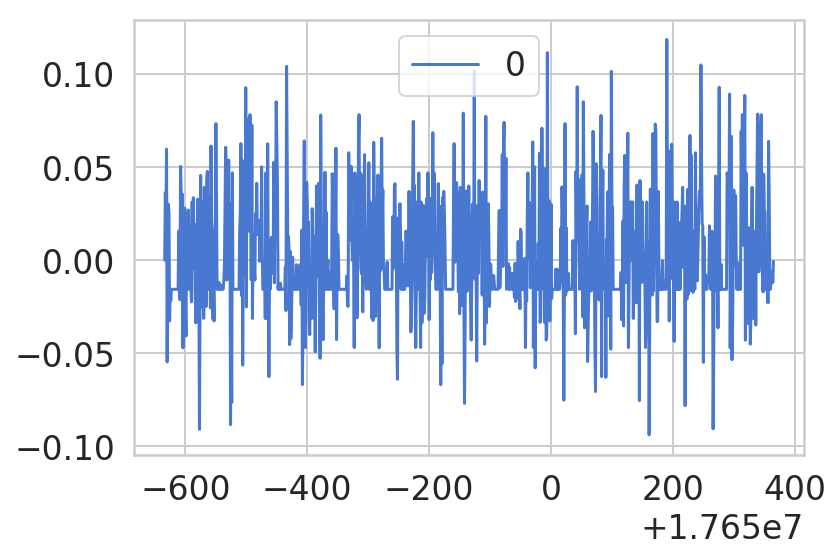

In [16]:
plt.plot(df.X1[-1000:],data=df)
plt.legend(df.label)

In [17]:
temp=np.sqrt(df.X1**2 + df.Y1**2 + df.Z1**2)

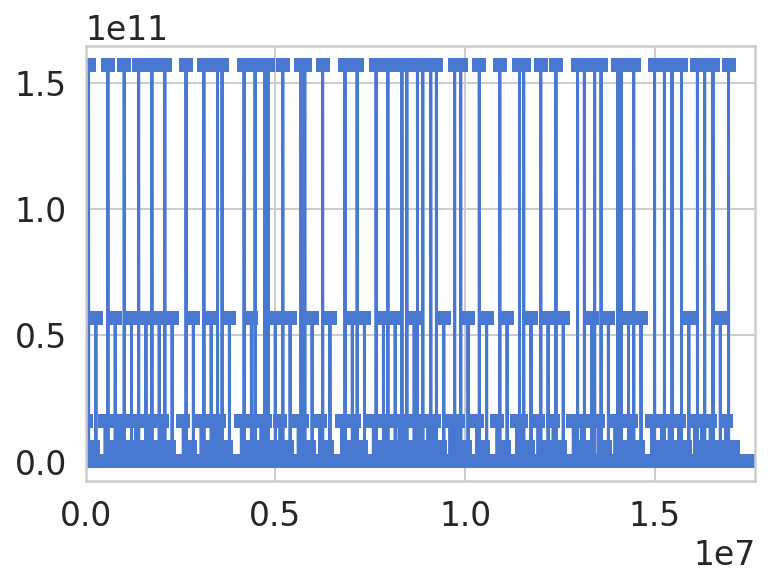

In [18]:
temp.plot(marker='s')

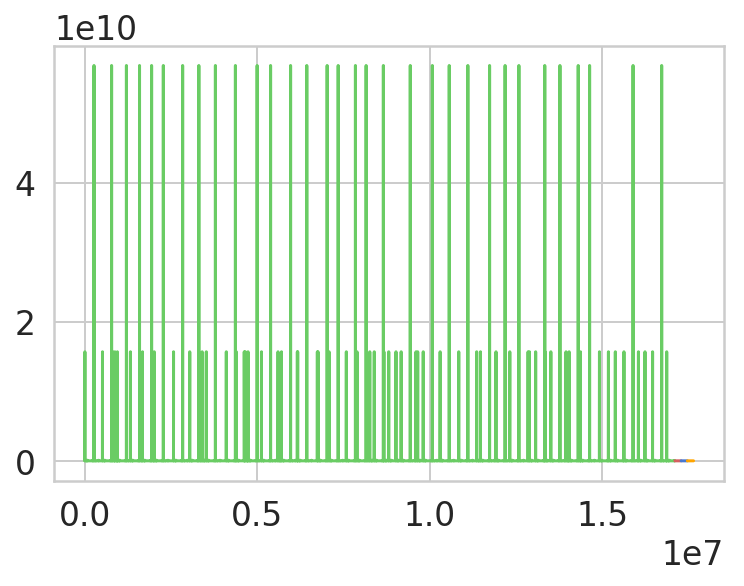

In [19]:
plt.plot(df.X1[df.label==0], 'g')
plt.plot(df.X1[df.label==3], 'r')
plt.plot(df.X1[df.label==6], 'b')
plt.plot(df.X1[df.label==9], 'orange')

In [20]:
np.max(df.X1[df.label==0]),np.max(df.X1[df.label==3])

(56860011230.0, 0.306641)

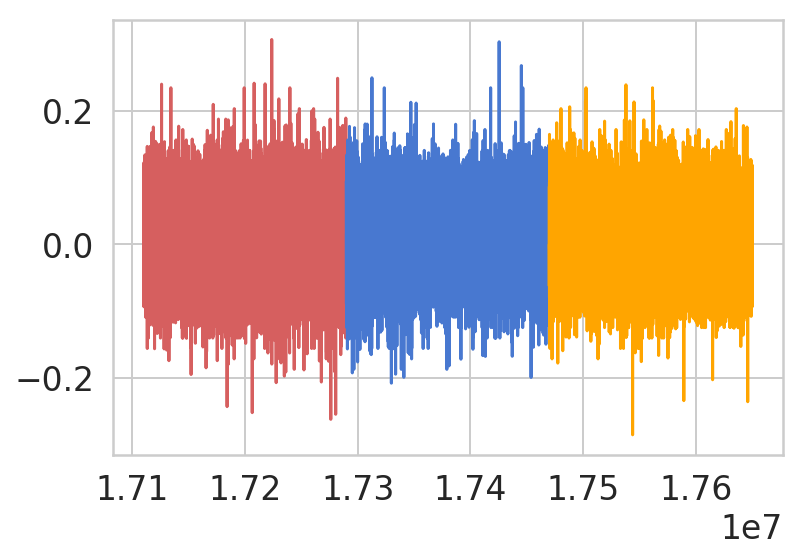

In [21]:
plt.plot(df.X1[df.label==3], 'r')
plt.plot(df.X1[df.label==6], 'b')
plt.plot(df.X1[df.label==9], 'orange')

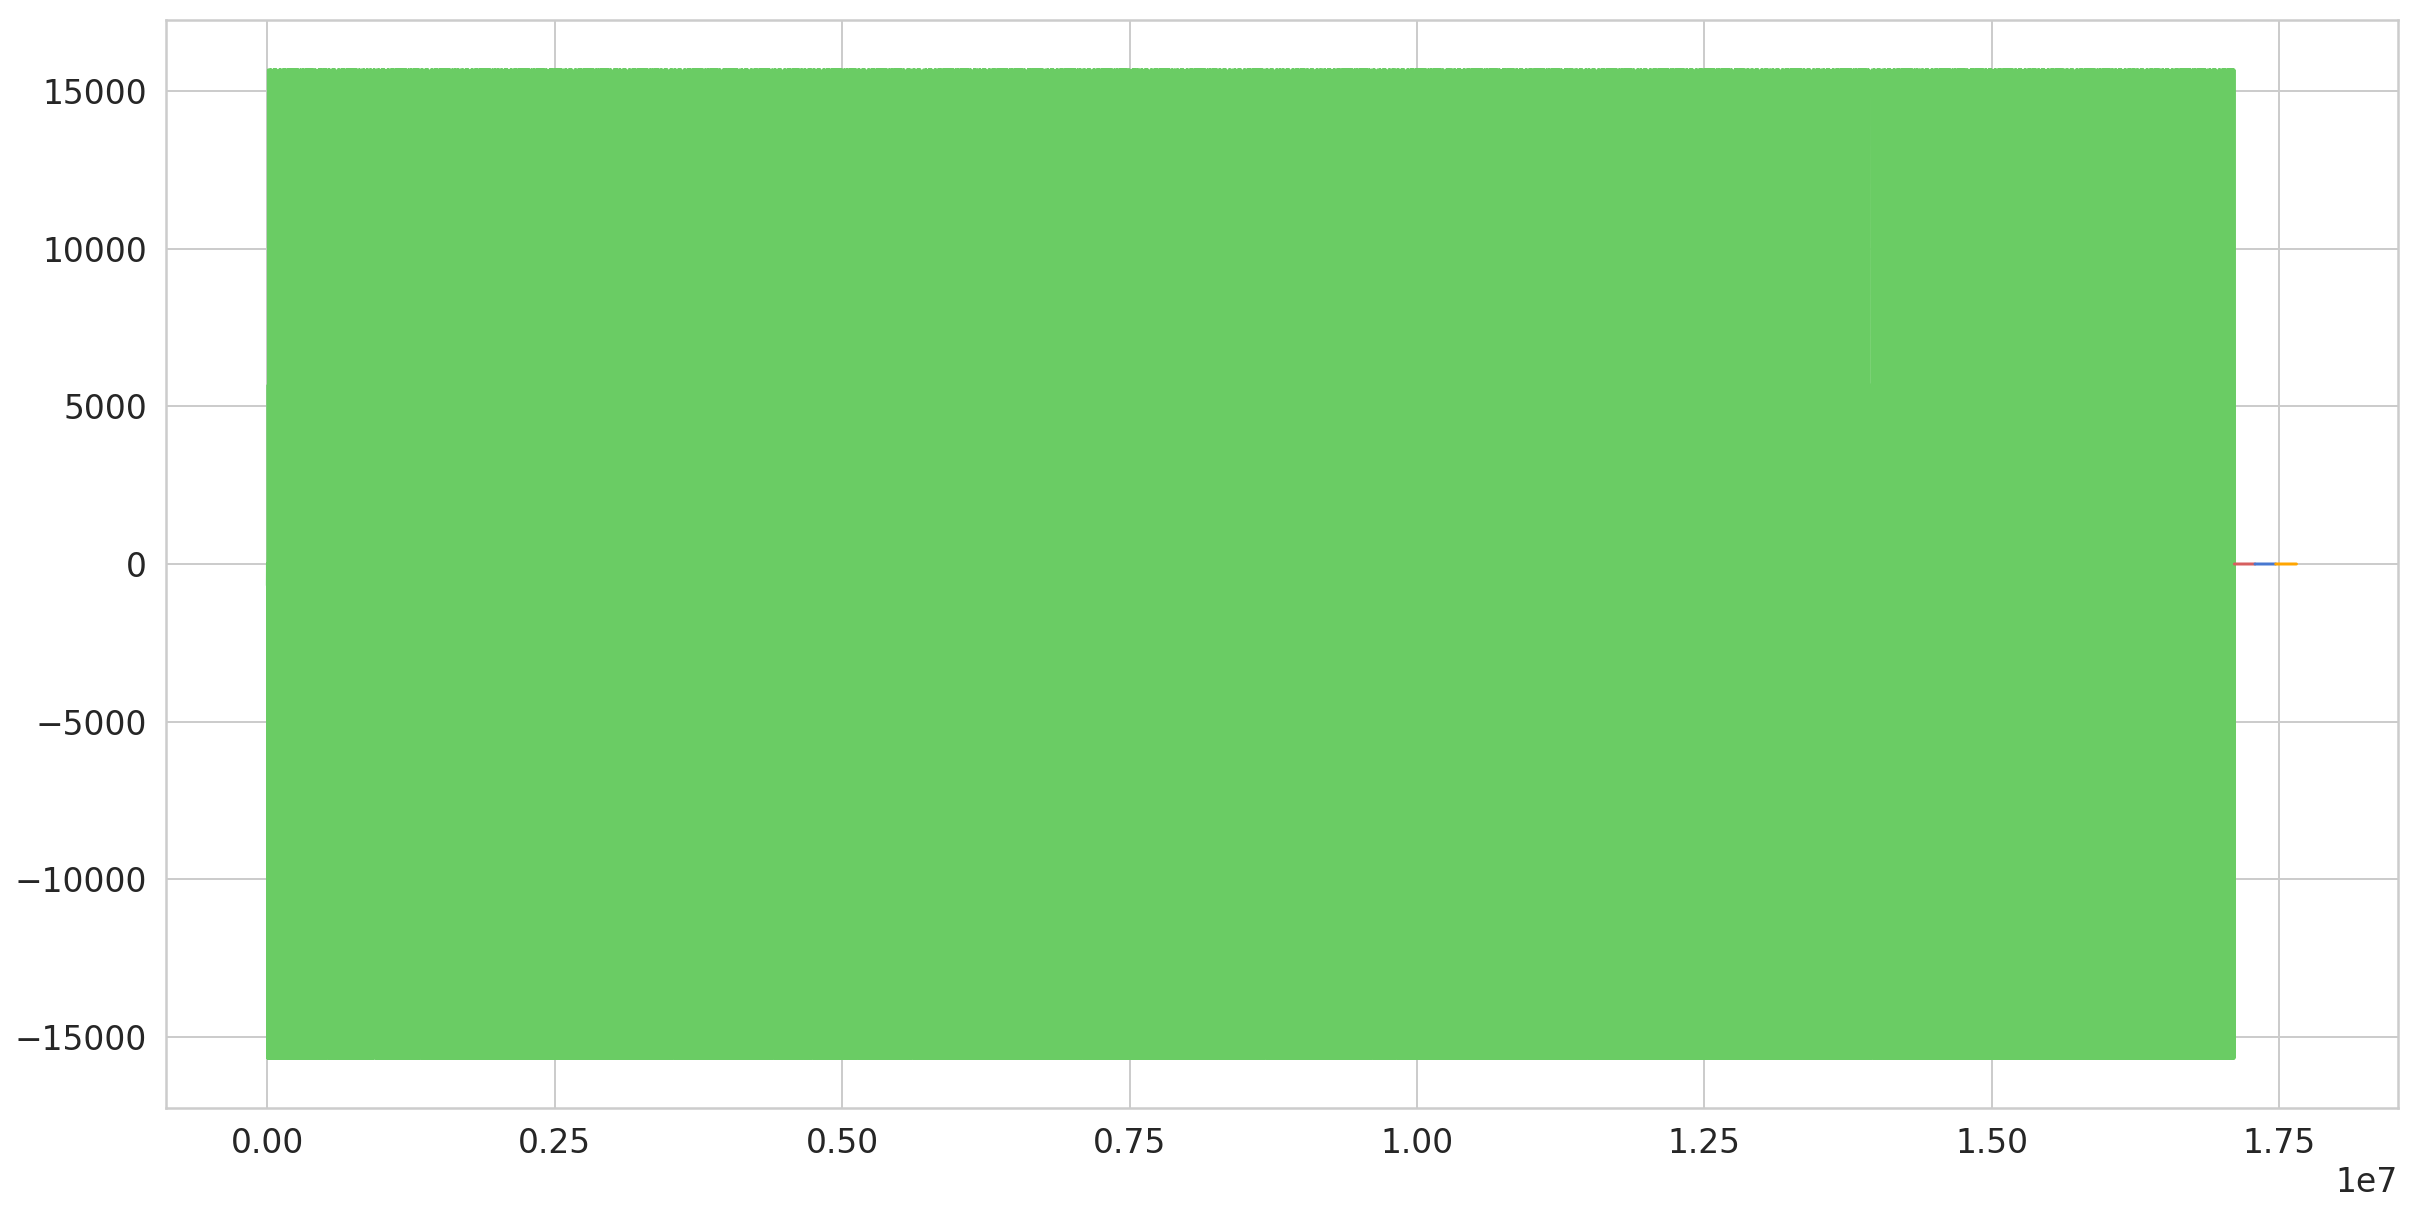

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df.X2[df.label==0], 'g')
plt.plot(df.X2[df.label==3], 'r')
plt.plot(df.X2[df.label==6], 'b')
plt.plot(df.X2[df.label==9], 'orange')

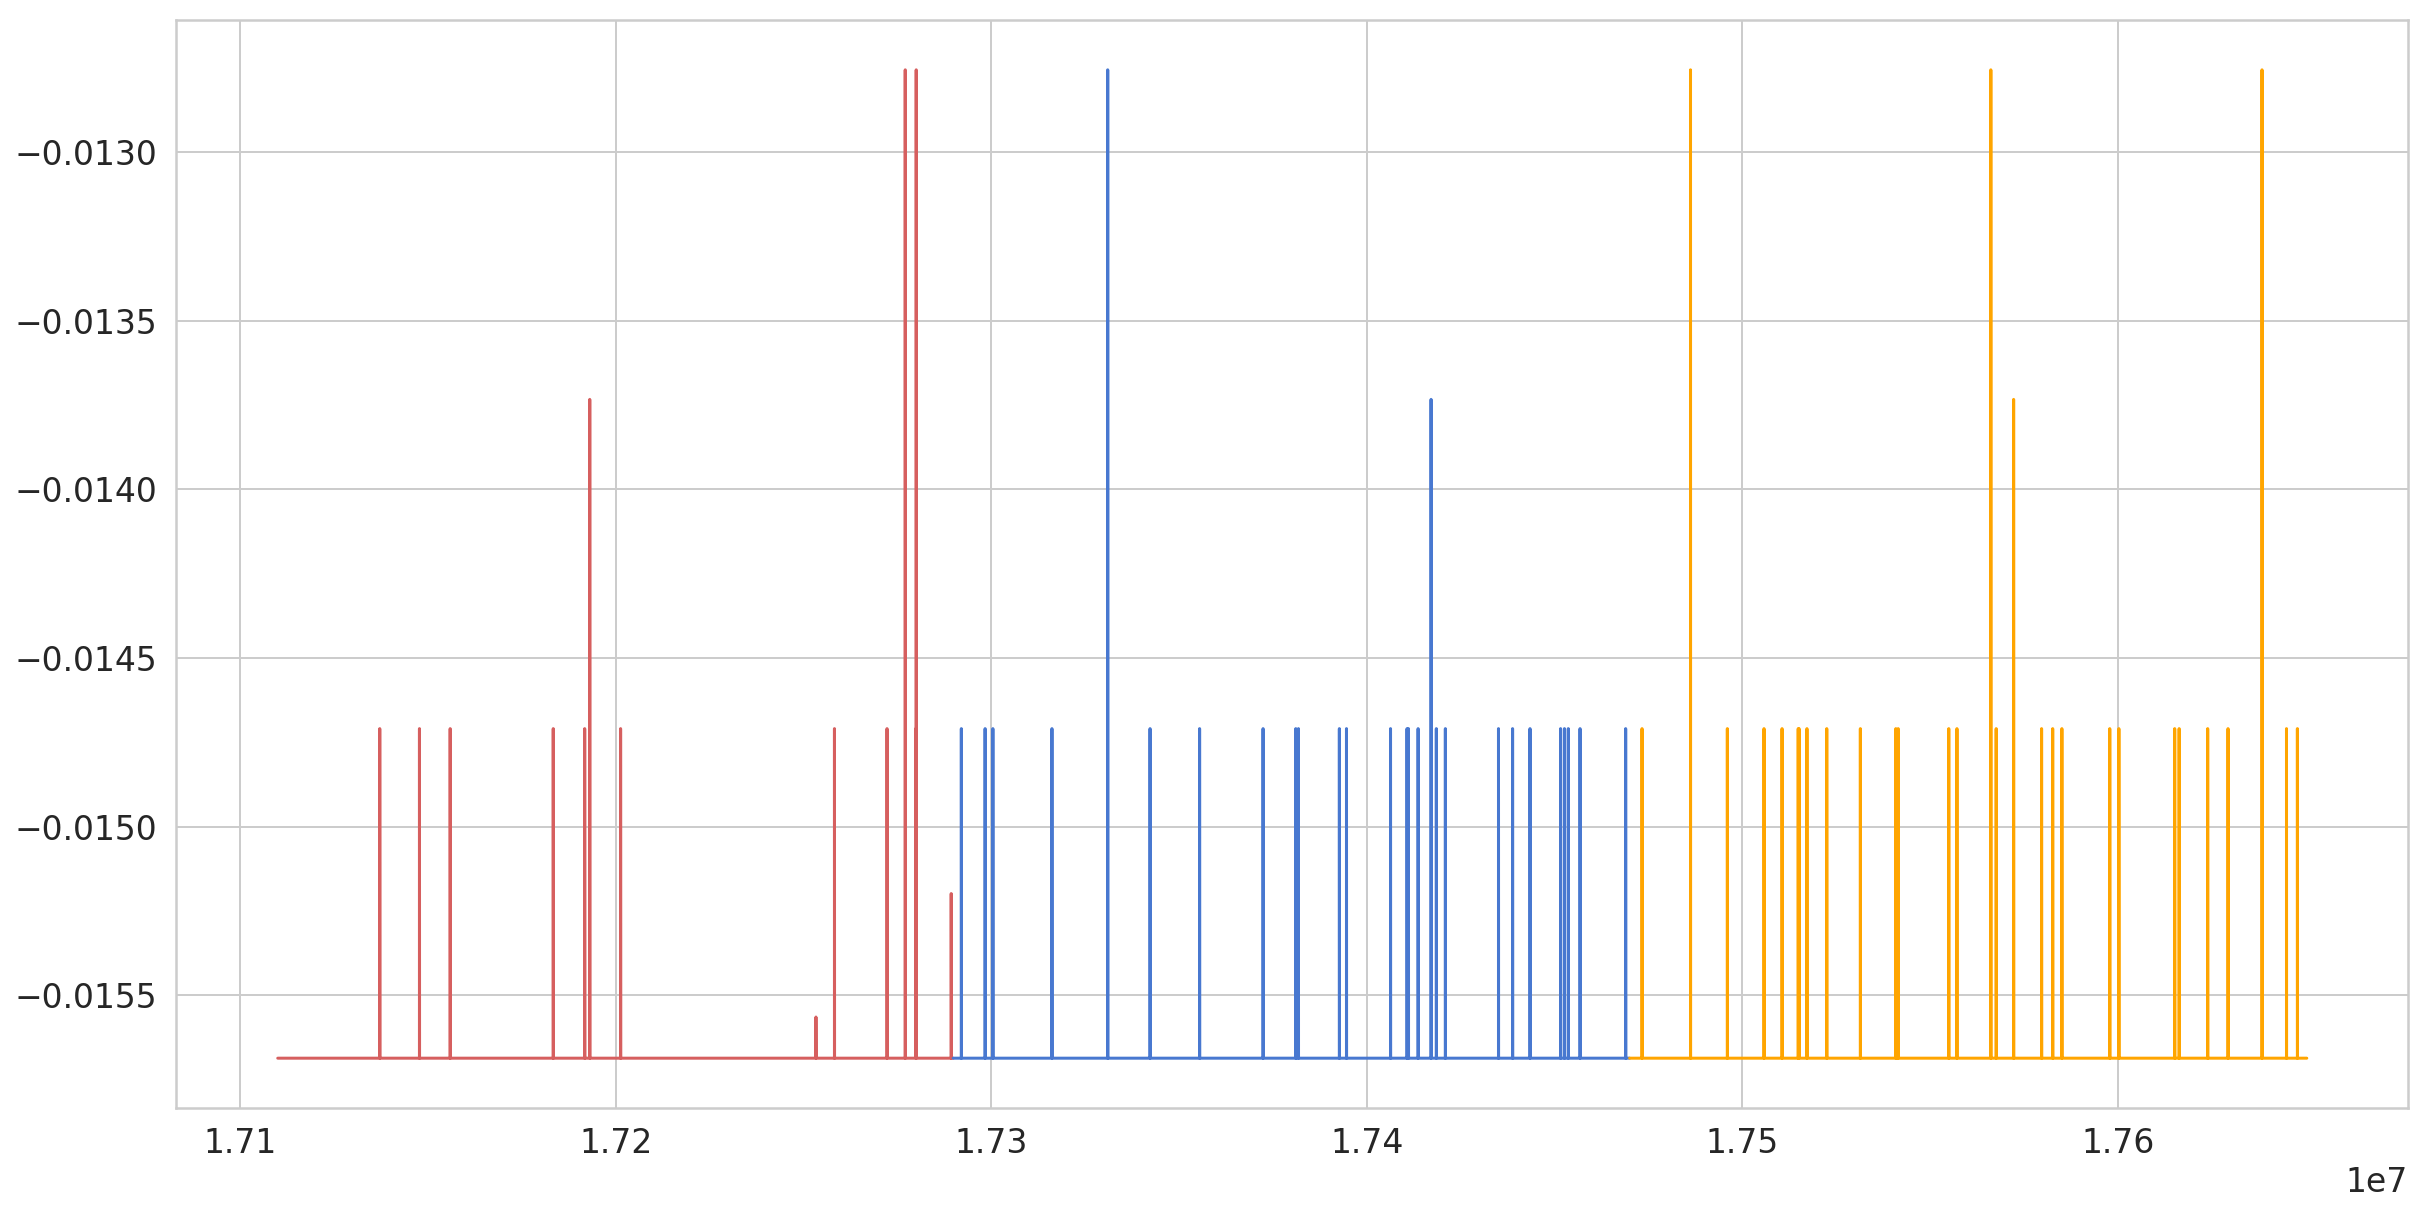

In [29]:
plt.figure(figsize=(20,10))
plt.plot(df.X2[df.X2 < -0.01][df.label==3], 'r')
plt.plot(df.X2[df.X2 <- 0.01][df.label==6], 'b')
plt.plot(df.X2[df.X2 < -0.01][df.label==9], 'orange')

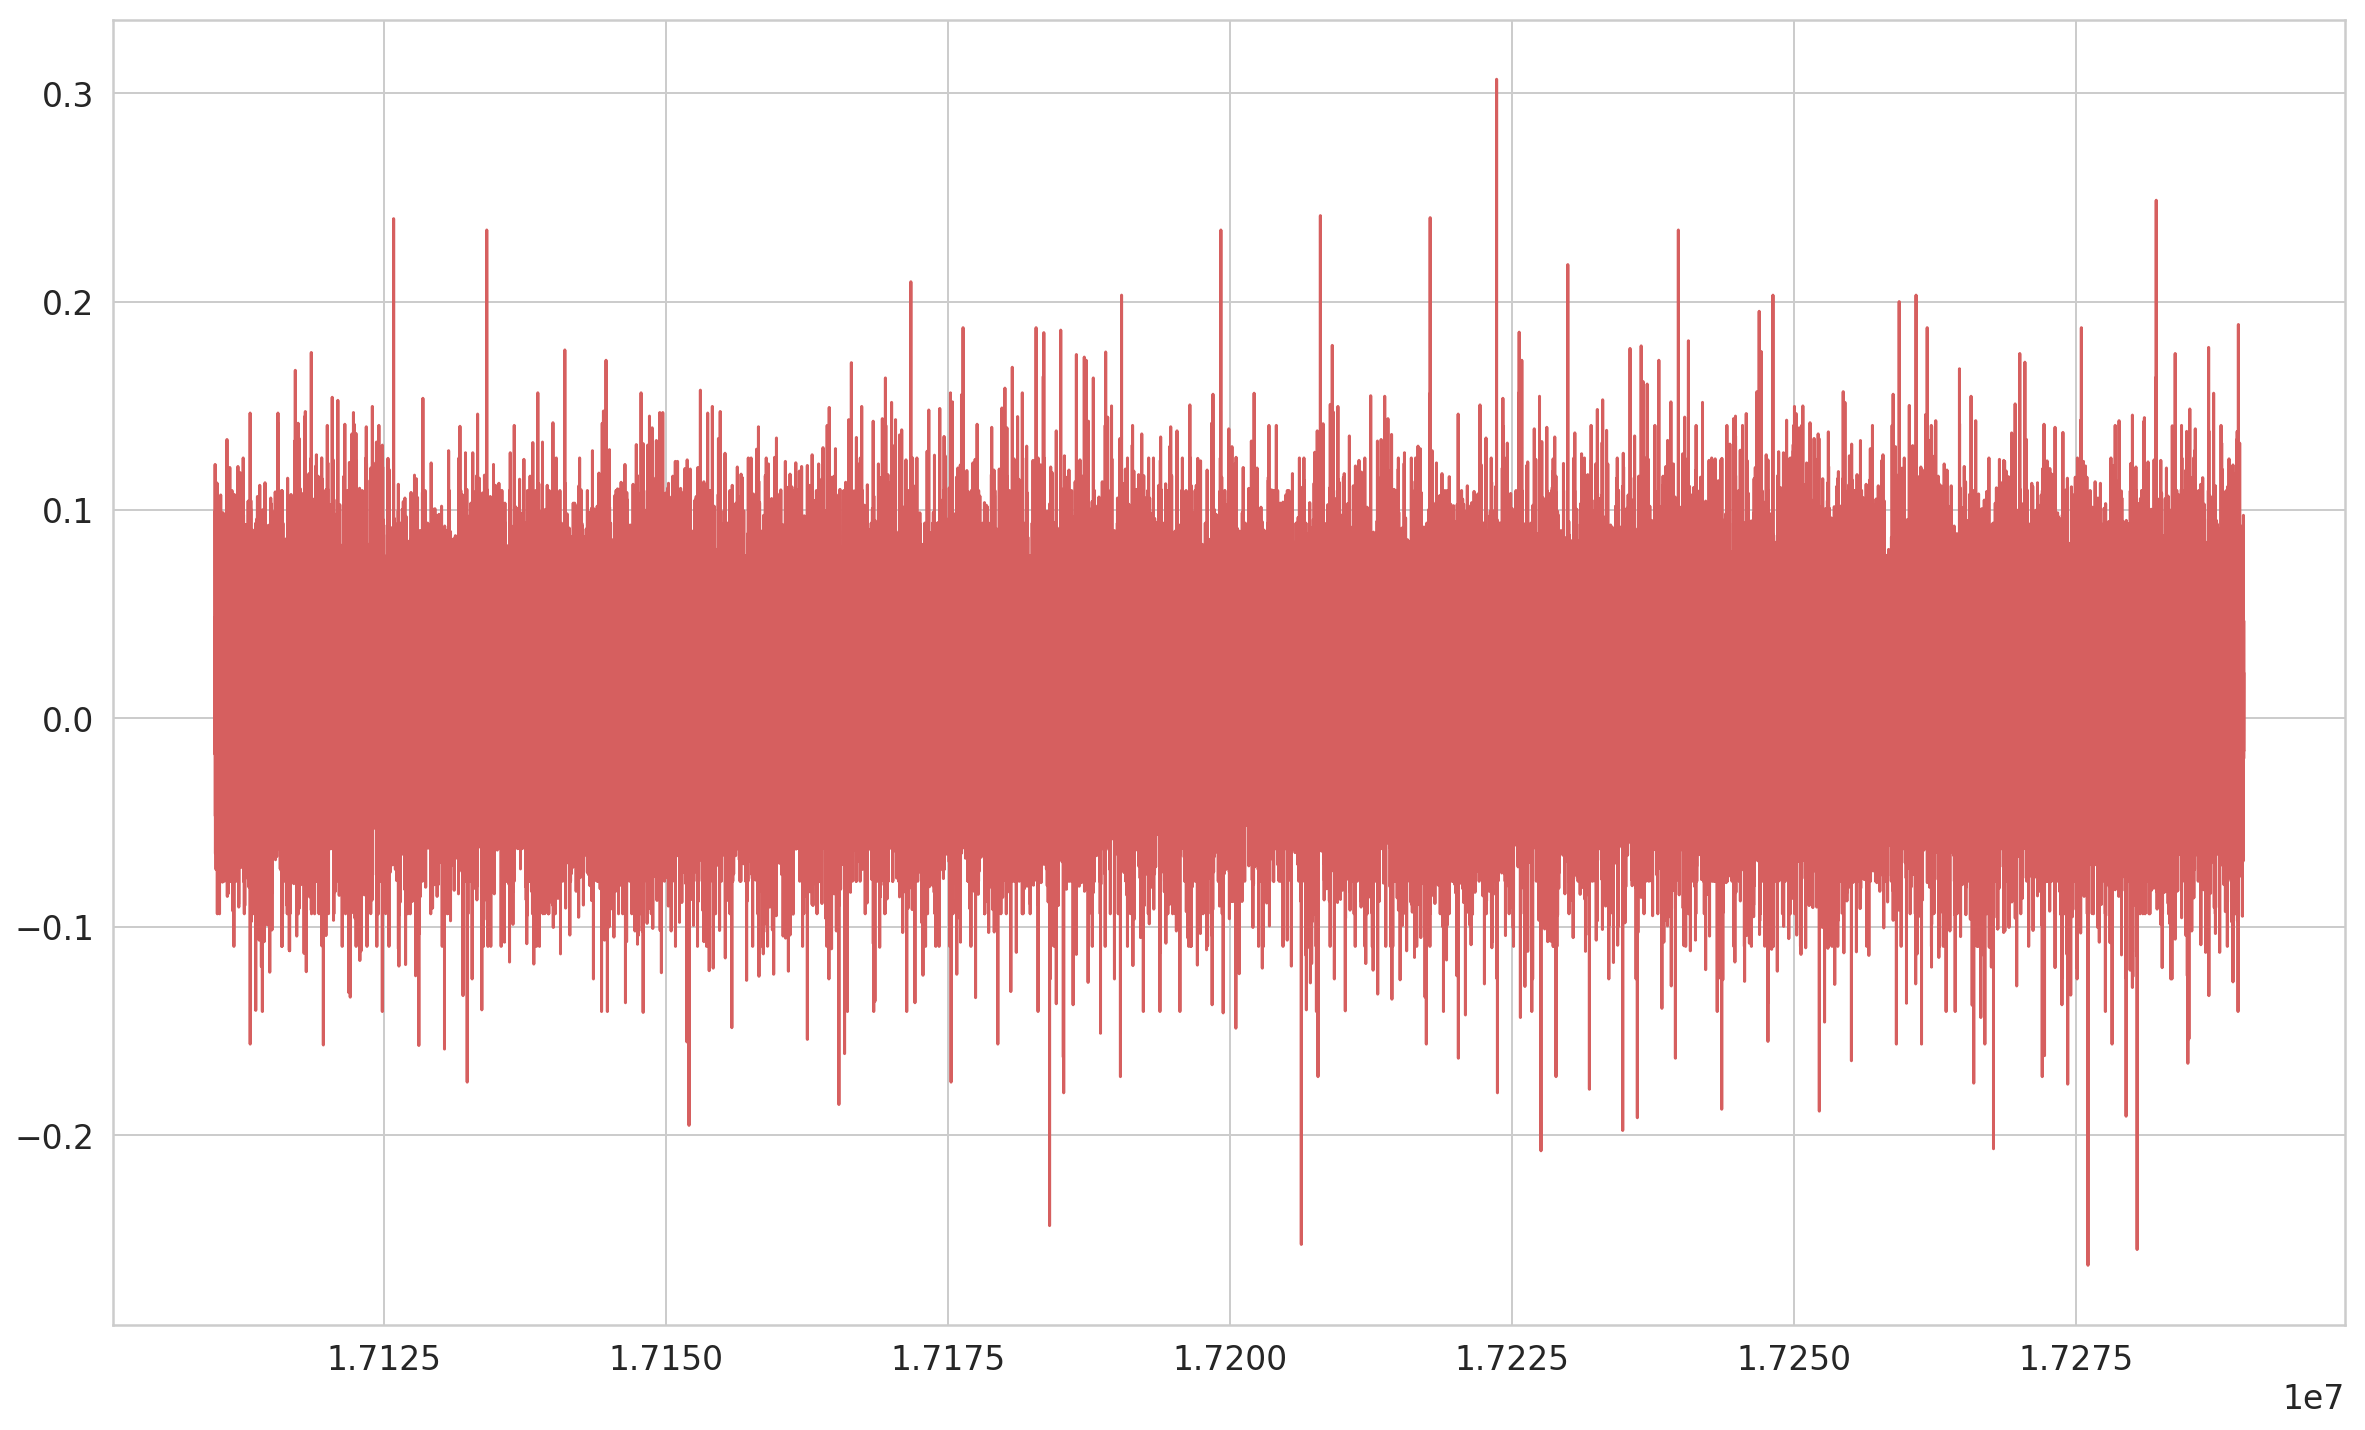

In [31]:
plt.figure(figsize=(20,12))
plt.plot(df.X1[df.label==3], 'r')

In [58]:
df.X1[df.label==3].describe()

count    179884.000000
mean          0.004128
std           0.032245
min          -0.262451
25%          -0.015686
50%          -0.002930
75%           0.022949
max           0.306641
Name: X1, dtype: float64

In [51]:
from sklearn.preprocessing import RobustScaler as r

In [53]:
scaler = r()

In [54]:
tmp2 = pd.DataFrame(df.X1[df.label==3])

In [55]:
tmp2

,X1
17110000,-0.004883
17110001,-0.015686
17110002,-0.015686
17110003,-0.015686
17110004,-0.010742
17110005,-0.015686
17110006,-0.005859
17110007,0.046631
17110008,0.002197
17110009,0.011475


In [56]:
tmp2=scaler.fit_transform(tmp2)

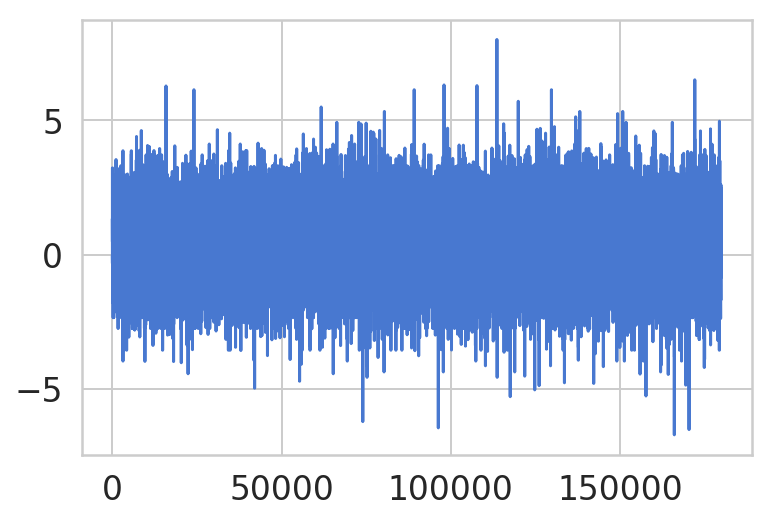

In [57]:
plt.plot(tmp2)

In [77]:
t=pd.DataFrame(tmp2)

In [78]:
t

,0
0,-0.050550
1,-0.330167
2,-0.330167
3,-0.330167
4,-0.202200
5,-0.330167
6,-0.075812
7,1.282801
8,0.132704
9,0.372848


In [74]:
tmp3=tmp2.tolist()

In [79]:
# 학습데이터 80%
train_size = int(len(t) * 0.8)
# 테스트데이터 나머지20%
test_size = len(t) - train_size
train, test = t[0:train_size], t[train_size:]
print(len(train), len(test))

143907 35977


In [92]:
test.columns = ['X1']

In [94]:
test.head()

,X1
143907,0.669833
143908,1.156413
143909,0.549786
143910,0.556102
143911,-1.947871


In [95]:
test.index = range(len(test))

In [98]:
test.values

array([[ 0.66983305],
       [ 1.15641258],
       [ 0.54978646],
       ...,
       [-0.33016695],
       [-0.33016695],
       [-0.33016695]])

In [100]:
train.columns = ['X1']

In [83]:
# 데이터 세팅함수
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)]
        Xs.append(v)        
        ys.append(X.iloc[i+time_steps])
        # y는 time_step 다음 값으로 설정
    return np.array(Xs), np.array(ys)

In [101]:
time_steps = 80 # 20, 40, 80 등으로 다양하게 시도해봄 -> 결과에 유의미한 차이 없었음

X_train, y_train = create_dataset(train.X1, time_steps)
X_test, y_test = create_dataset(test.X1, time_steps)

print(X_train.shape, y_train.shape)

(143827, 80) (143827,)


In [102]:
X_test

array([[ 0.66983305,  1.15641258,  0.54978646, ...,  0.88311117,
        -0.84042966,  1.15641258],
       [ 1.15641258,  0.54978646,  0.55610198, ..., -0.84042966,
         1.15641258,  1.32703507],
       [ 0.54978646,  0.55610198, -1.9478711 , ...,  1.15641258,
         1.32703507,  1.18170053],
       ...,
       [ 0.88311117,  0.07425909, -0.33016695, ..., -0.33016695,
        -0.33016695, -0.33016695],
       [ 0.07425909, -0.33016695,  0.07425909, ..., -0.33016695,
        -0.33016695, -0.33016695],
       [-0.33016695,  0.07425909, -0.33016695, ..., -0.33016695,
        -0.33016695, -0.33016695]])

In [103]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(143827, 80, 1)

In [104]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [105]:
history = model.fit(
    X_train, y_train, 
    epochs=30,  # epoch 30, 100 시도 -> 별 차이 없음
    batch_size=20, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
6473/6473 [==============================] - 240s 37ms/step - loss: 0.6728 - val_loss: 0.6788
Epoch 2/30
6473/6473 [==============================] - 244s 38ms/step - loss: 0.6605 - val_loss: 0.6783
Epoch 3/30
6473/6473 [==============================] - 239s 37ms/step - loss: 0.6567 - val_loss: 0.6743
Epoch 4/30
6473/6473 [==============================] - 209s 32ms/step - loss: 0.6543 - val_loss: 0.6725
Epoch 5/30
6473/6473 [==============================] - 210s 32ms/step - loss: 0.6525 - val_loss: 0.6729
Epoch 6/30
6473/6473 [==============================] - 218s 34ms/step - loss: 0.6512 - val_loss: 0.6677
Epoch 7/30
6473/6473 [==============================] - 224s 35ms/step - loss: 0.6499 - val_loss: 0.6679
Epoch 8/30
6473/6473 [==============================] - 224s 35ms/step - loss: 0.6489 - val_loss: 0.6671
Epoch 9/30
6473/6473 [==============================] - 225s 35ms/step - loss: 0.6479 - val_loss: 0.6683
Epoch 10/30
6473/6473 [==============================] 

In [106]:
y_pred = model.predict(X_test)

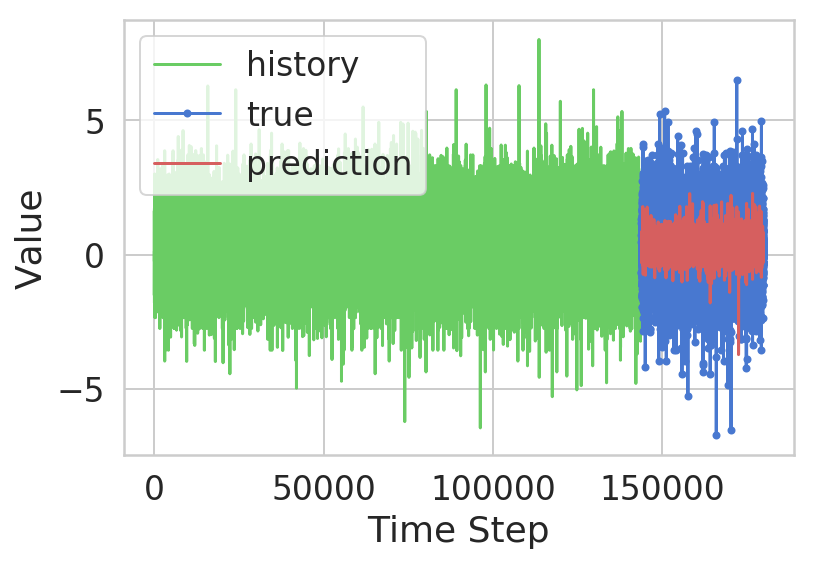

In [109]:
# 예측값 실제값 그래프 확인
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

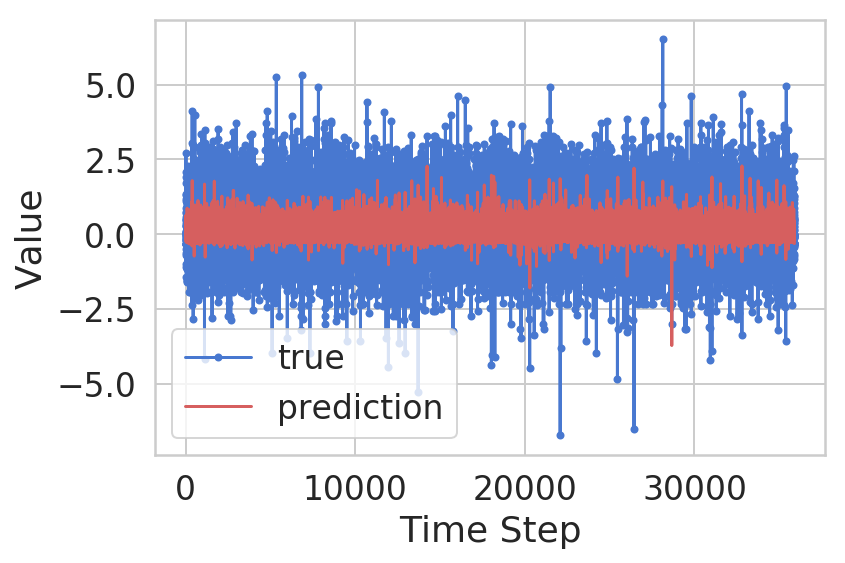

In [110]:
# 예측값과 실제값 비교
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();